# Strategic Thinking CA1

In [9]:
# IMPORTS AND CONFIGURATIONS

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np

# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# import pandas_profiling
# from pandas_profiling import ProfileReport

import glob
import os

## Data Understanding
Preprocessing a dataset through data characterisation involves summarising the features and characteristics present in the data using statistical measures and visualisations techniques such as bar charts and scatter plots. After this stage, it should be possible to identify biases, patterns, trends, and any missing or irrelevant data in the data set that may need to be addressed.

This dataset is composed by instances of eight types of undesirable events characterized by eight process variables from three different sources: real instances, simulated instances and hand-drawn instances. All real instances were taken from the plant information system that is used to monitor the industrial processes at an operational unit in Brazilian state of Espírito Santo. The simulated instances were all generated using OLGA ([Schlumberger](https://www.software.slb.com/products/olga)), a dynamic multiphase flow simulator that is widely used by oil companies worldwide (Andreolli, 2016). Finally, the hand-drawn instances were generated by a specific tool developed by Petrobras researchers for this dataset to incorporate undesirable events classfied as rare. 
 
### Data Characterisation
The data consists of over 50 million observations, with 13 columns of data for each observation. The first column, `label`, indicates the event type for each observation. The second column, `well`, contains the name of the well the observation was taken from. Hand-drawn and simulated instances have fixed names for in this column, while real instances have names masked with incremental id. The third column, `id`, is an identifier for the observation and it is incremental for hand-drawn and simulated instances, while each real instance has an id generated from its first timestamp. The columns representing the process variables are:

* P-PDG: pressure variable at the Permanent Downhole Gauge (PDG);
* P-TPT: pressure variable at the Temperature and Pressure Transducer (TPT);
* T-TPT: temperature variable at the Temperature and Pressure Transducer (TPT);
* P-MON-CKP: pressure variable upstream of the production choke (CKP);
* T-JUS-CKP: temperature variable downstream of the production choke (CKP);
* P-JUS-CKGL: pressure variable upstream of the gas lift choke (CKGL);
* T-JUS-CKGL: temperature variable upstream of the gas lift choke (CKGL);
* QGL: gas lift flow rate;

The pressure features are measured in Pascal (Pa), the volumetric flow rate features are measured in standard cubic meters per second (SCM/s), and the temperature features are measured in degrees Celsius (°C). Finally `class` label can be used to identify periods of normal operation, fault transients, and faulty steady states, which can help with diagnosis and maintenance. 

In [10]:
df = pd.read_csv('3Wdataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13952911 entries, 0 to 13952910
Data columns (total 13 columns):
 #   Column      Dtype  
---  ------      -----  
 0   label       int64  
 1   well        object 
 2   id          int64  
 3   P-PDG       float64
 4   P-TPT       float64
 5   T-TPT       float64
 6   P-MON-CKP   float64
 7   T-JUS-CKP   float64
 8   P-JUS-CKGL  float64
 9   T-JUS-CKGL  float64
 10  QGL         float64
 11  class       float64
 12  source      object 
dtypes: float64(9), int64(2), object(2)
memory usage: 1.4+ GB


In [11]:
df.head()

,label,well,id,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class,source
0,0,WELL-00002,20170625220127,0.0,8698015.0,117.6015,2142158.0,75.63453,2310426.0,NaN,0.0,0.0,real
1,0,WELL-00002,20170625220127,0.0,8698015.0,117.6014,2172395.0,75.65491,2310427.0,NaN,0.0,0.0,real
2,0,WELL-00002,20170625220127,0.0,8698015.0,117.6013,2202631.0,75.67529,2310427.0,NaN,0.0,0.0,real
3,0,WELL-00002,20170625220127,0.0,8698015.0,117.6012,2180472.0,75.69567,2310427.0,NaN,0.0,0.0,real
4,0,WELL-00002,20170625220127,0.0,8698015.0,117.6011,2158313.0,75.71606,2310428.0,NaN,0.0,0.0,real


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,13952911.0,1.148766e+00,1.915042e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,7.000000e+00
id,13952911.0,2.016723e+13,1.100105e+10,2.013110e+13,2.017022e+13,2.017062e+13,2.017082e+13,2.018062e+13
P-PDG,13947036.0,-1.793768e+40,1.443842e+41,-1.180116e+42,0.000000e+00,0.000000e+00,2.557521e+07,4.485805e+07
P-TPT,13946727.0,1.658634e+07,8.299832e+07,0.000000e+00,8.765344e+06,1.421212e+07,1.806949e+07,2.941990e+09
T-TPT,13946725.0,1.076740e+02,2.029370e+01,0.000000e+00,1.065922e+02,1.166376e+02,1.175977e+02,1.196061e+02
P-MON-CKP,12831283.0,5.528575e+06,4.027920e+06,-8.317492e+03,1.757234e+06,5.448043e+06,9.295970e+06,1.235933e+07
T-JUS-CKP,12341213.0,7.391489e+01,3.101341e+01,-2.020000e+00,6.495843e+01,7.043581e+01,7.655559e+01,1.730961e+02
P-JUS-CKGL,10007488.0,4.052477e+06,5.221975e+06,-4.976717e+05,2.312238e+06,2.332198e+06,3.430441e+06,2.106982e+07
T-JUS-CKGL,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QGL,10691260.0,1.694197e-01,4.591983e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.146513e+00


In order to maintain the realistic aspects of the data, the dataset was extracted without preprocessing, including the presence of `NaN` values, frozen variables due to sensor or communication issues, instances with varying sizes, and outliers (R.E.V. Vargas, et al. 2019). 

From all 50,822,124 entries, 3,086,851 are duplicated, that is, approximately 6.07% of total. These duplicated rows may be related to frozen variables from real instances, as simulated and hand-drawn instances are naturally free of such problems. Although no missing values were found for columns `label`, `well`, and `id`, other features presented null or absent values. Notably, the column `T-JUS-CKGL` turned out to be completely empty.

In [13]:
# Counting duplicated rows
df.duplicated().sum()

56920

In [16]:
# Finding missing values
missing = df.isnull()
missing.sum()

label                0
well                 0
id                   0
P-PDG             5875
P-TPT             6184
T-TPT             6186
P-MON-CKP      1121628
T-JUS-CKP      1611698
P-JUS-CKGL     3945423
T-JUS-CKGL    13952911
QGL            3261651
class             4761
source               0
dtype: int64

### Exploratory Data Analysis
There are 9 different labels in the dataset, with the majority of the data (13.2 million points) having a label of "Rapid Productivity Loss". The second most common label is "Normal", which is present in around 9.9 million data points. The remaining labels are present in smaller amounts, with the least common label being "Spurious Closure of DHSV" which is present in around 619,464 data points. See below a table with more details about each label and a bar chart describing how they are distributed:

In [19]:
label_counts = df['label'].value_counts()

# dictionary that maps labels to descriptions
label_descriptions = {
    0: 'Normal state',
    1: 'Abrupt Increase of BSW',
    2: 'Spurious Closure of DHSV',
    3: 'Severe Slugging',
    4: 'Flow Instability',
    5: 'Rapid Productivity Loss',
    6: 'Quick Restriction in PCK',
    7: 'Scaling in PCK',
    8: 'Hydrate in Production Line'
}

data = []
total_count = label_counts.sum()
for label, count in label_counts.items():
    description = label_descriptions[label]
    proportion = '{:.1%}'.format(count / total_count)    
    data.append((label, description, count, proportion))

df_table = pd.DataFrame(data, columns=['Label', 'Description', 'Value', 'Proportion (%)'])
df_table

,Label,Description,Value,Proportion (%)
0,0,Normal state,9956791,71.4%
1,4,Flow Instability,2462076,17.6%
2,3,Severe Slugging,569152,4.1%
3,5,Rapid Productivity Loss,361998,2.6%
4,7,Scaling in PCK,271708,1.9%
5,2,Spurious Closure of DHSV,158680,1.1%
6,1,Abrupt Increase of BSW,118294,0.8%
7,6,Quick Restriction in PCK,54212,0.4%


Text(0, 0.5, 'Count (Millions)')

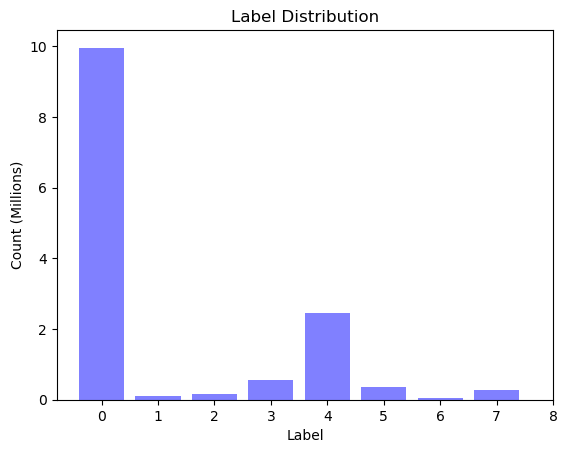

In [20]:
label_counts = df['label'].value_counts()
label_names = label_counts.index
label_values = label_counts.values / 1000000
plt.bar(label_names, label_values, color='#8080FF')
plt.xticks(range(9), range(9))
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count (Millions)')

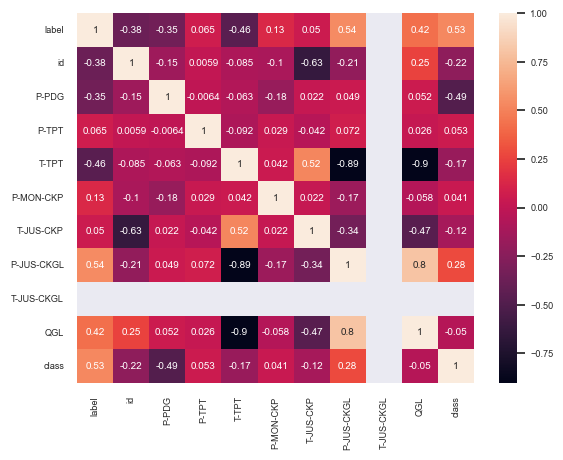

In [21]:
# Computing the correlations
corr = df.corr()
sns.set(font_scale=0.6)
sns.heatmap(corr, annot=True)
plt.show()

The heatmap above shows the correlation between all numerical features in a single graph. Overall, the `T-TPT` feature has very strong negative correlations with the features `P-JUS-CKGL` (-0.89) and `QGL` (-0.9). Also, `T-TPT` presents a strong positive correlation with `T-JUS-CKP` (0.6). In turn, `P-JUS-CKGL` has a strong positive correlation with `QGL` (0.8) and a moderate positive correlation with feature `label` (0.52). The `QGL` feature has also a moderate correlation with the `label` (0.42) and a moderate negative correlation with `T-JUS-CKP` (0.47). `T-JUS-CKGL` does not present correlations, since this feature is empty.

It's worth noting that the correlations are only one aspect to consider when analyzing the relationships between features in a dataset. It's also important to consider other factors such as the distribution of the data, the presence of outliers, and the underlying relationships between the features.

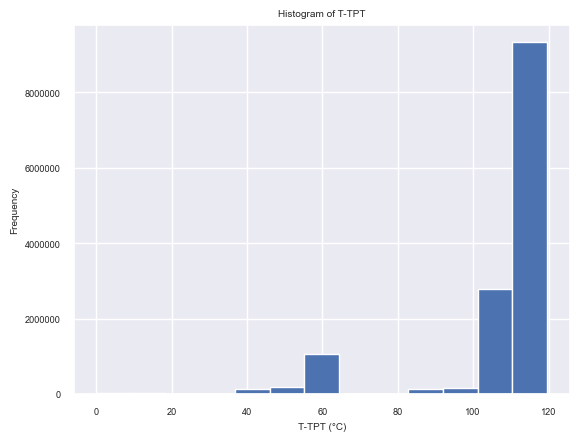

In [22]:
column = 'T-TPT'
df[column].plot(kind='hist', bins=13)
plt.title('Histogram of {}'.format(column))
plt.xlabel(f'{column} (°C)')
plt.ylabel('Frequency')

# Set the y-axis to show millions
ax = plt.gca()
ax.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.show()

The histogram above shows how the values for T-TPT (temperature variable at the Temperature and Pressure Transducer) are distributed. This variable appears to have a significant correlation with other features and must be considered in further investigations. As it can be seen, it presents values between 100°C and 120°C for the majority of observations, which may indicate that colder temperatures in this equipment are related to issues in the Subsea Christmas Tree operation. 

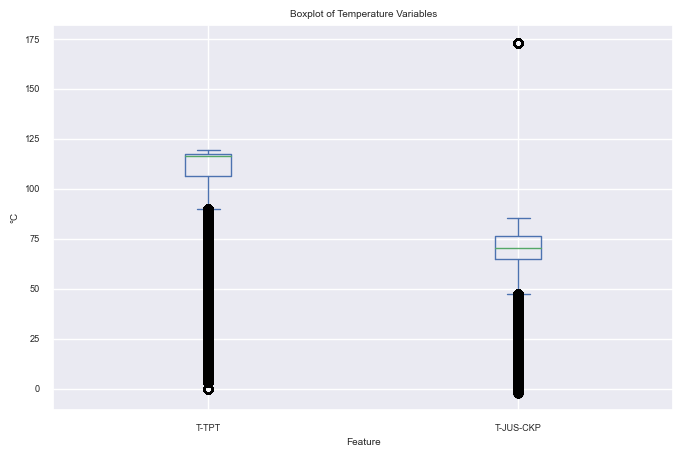

In [23]:
columns = ['T-TPT','T-JUS-CKP']

df[columns].plot(kind='box', figsize=(8, 5))
plt.title('Boxplot of Temperature Variables')
plt.xlabel('Feature')
plt.ylabel('°C')
plt.show()

The boxplots above compare how data is distributed in two features, `T-TPT` and `T-JUS-CKP` (temperature variable downstream of the production choke - CKP). While 50% of observations for `T-TPT` are between 95°C-120°C, `T-JUS-CKP` seems to work on milder conditions, with half of observations between 70°C-85°C.

The boxplots below present how data is distributed in the features measured in Pascal (Pa). As a reference for this analysis, the atmospheric pressure at sea level is approximately 101,325 Pa and the pressure that a body experiences at a 2000 meters below sea level - which is a realistic depth for a oil well in this project context - is approximately 2,061,200 Pa. 

To generate the following boxplots together, it was decided to omit the outlier points, since future analyzes will be necessary to understand the nature of these extraordinary measurements and they could distort the graphs considerably at this point.

From all pressure features, only `P-PDG` (pressure variable at the Permanent Downhole Gauge) presented negative values in its series. The PDG is installed at the bottom of the well and it may measure a negative pressure in pascals if the pressure inside the well is lower than the pressure outside the well, but it also measure values above 30 MPa. 

The features `P-MON-CKP` and `P-JUS-CKGL` - pressure variable upstream of the production choke and of the gas lift choke, respectively - present a more comparable range of values, with approximately half of measurements between 1 MPa and 5 MPa. Also, `P-TPT`(pressure variable at the Temperature and Pressure Transducer), presents the most symetric distribution among all 4 pressure features, which indicates that the data is closer to a normal distribution than in other features, with the median approximately 15 MPa.

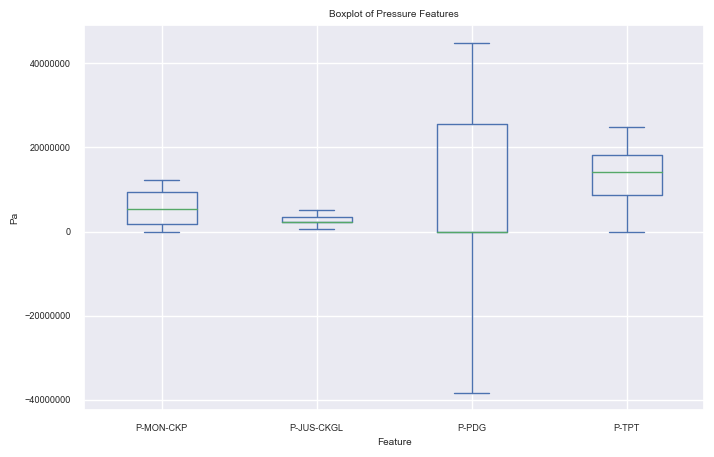

In [24]:
columns = ['P-MON-CKP','P-JUS-CKGL','P-PDG','P-TPT'] 
df[columns].plot(kind='box', figsize=(8, 5), showfliers=False)
plt.title('Boxplot of Pressure Features')
plt.xlabel('Feature')
plt.ylabel('Pa')
ax = plt.gca()
ax.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.show()

Finally, it was observed that `QGL` data (gas lift flow rate) is heavily concentrated at the range 0.0 SCM/s-0.2 SCM/s with more almost 10 million rows, while other ranges do not present more than 1 million observations. To illustrate how it is distributed throughout all ranges, it was decided to use log scale on y-axis (Frequency) for the following histogram.

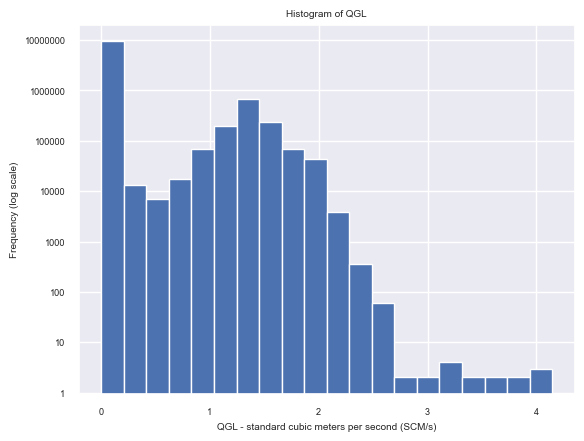

In [26]:
column = 'QGL'
df[column].plot(kind='hist', bins=20)
plt.title('Histogram of {}'.format(column))
plt.xlabel(f'{column} - standard cubic meters per second (SCM/s)')
plt.ylabel('Frequency (log scale)')

plt.semilogy() # to set the y-axis to log scale

def y_formatter(y, pos):
    return f'{y:.0f}'

formatter = FuncFormatter(y_formatter)
ax = plt.gca()
ax.yaxis.set_major_formatter(formatter)

plt.show()

## Data Preparation

Data preparation is a critical step in the machine learning process and can have a significant impact on the performance and interpretability of the model. It involves cleaning and formatting the data, as well as selecting and transforming features to feed into the model. This step might involve removing any irrelevant or redundant data, handling missing values, and ensuring that the data is in a suitable format for the machine learning algorithm being used. It may also involve feature engineering, which involves creating new features or modifying existing ones to better represent the data and improve model performance.

### Data Cleaning 

In the initial stage of data preparation, we focused on cleaning the dataset in order to facilitate the application of machine learning models. Specifically, we removed the `T-JUS-CKGL` column, which only contained "Not a Number" (`NaN`) values, as many `sklearn` algorithms are unable to handle such missing data. While one option to address this issue would be to generate values to fill the `NaN` entries, we decided not to pursue this approach due to the high level of precision required by the data in the dataset. Instead, we chose to remove this column in order to maintain the integrity of the data.

Another common practice is to rename and/or reformat columns and headers as necessary. In this case, it was determined that the original dataset was of sufficient quality for use in machine learning models and therefore there was no need to reformat. It was decided to keep the names of the columns as they were originally defined, as they seemed compact enough for further iterations and also semantically meaningful for further analysis.

In the next stage of our process, we sought to address null values and duplicates within the dataset. Based on our initial data understanding, we determined the percentage of null values and duplicates present in the data. While null values can be imputed, we opted to remove them from the dataset as a precautionary measure, given the potential negative impact they could have on the model. With regards to duplicates, we considered the presence of "frozen" data, which refers to data recorded during periods of no change in the system. After conducting experiments, we ultimately chose to remove duplicate rows as they did not significantly impact the accuracy of the model.

After conducting a correlation analysis using a heatmap in the data understanding phase, we were able to identify the correlations between different columns. This enabled us to determine which columns had the most influence on our desired outcome and which could be removed. We decided to drop the "well ID, class, and index" columns. While the well number and class are important pieces of information that could be useful for classification purposes in the future, we chose to exclude them in this instance in order to establish a baseline prediction model that was not influenced by location or artificial tags. 

The `class` tag will be valuable in future iterations when seeking to improve predictions for multiple problems. Our analysis also revealed that the "flow instability" problem (event #4) contained the most data among the real instances, making it an appropriate choice for the baseline prediction model. Additionally, flow instability often leads to other problems, making it a suitable focus. As a result, we limited the dataset to include only labels 0 and 4, where label 0 represents control (i.e. rows with no problems) and label 4 represents rows with flow instability issues.


### Data Balancing & Scaling

In Figure 4 (Label Variable), it can be seen that there is an imbalance in the number of rows between our control and problem groups. As this limits the models that can be used due to the low rate of problems, balancing the dataset is necessary, since it enables the use of multiple models and improve accuracy. 

The process of balancing involves adjusting the distribution of rows within the dataset such that there is an equal distribution between the resulting classes. In this instance, it was determined that the `RandomUnderSampler` method should be employed due to the imbalanced nature of the dataset, specifically with regard to the underrepresented minority class of Flow Instability (#4). Additionally, as the dataset remains large following data cleaning, it was feasible to remove elements from the majority class without significantly diminishing the overall size of the dataset. The use of this strategy is expected to mitigate the risk of overfitting, while minimizing the loss of valuable data and potential impact on model performance.

In order to further enhance the accuracy and optimization of our dataset, we have decided to implement feature scaling. This process involves standardizing the data by reducing the difference between the minimum and maximum values. A significant difference between these values can result in poor optimization of certain models. 

We had initially intended to utilize LinearSVC, KNN, and Tree based algorithms with our dataset. The application of scaling to our data benefits models such as SVC and KNN that rely on the plotting of data, while having no impact on Tree based algorithms. To accomplish this, we utilized the `StandardScaler` from the `sklearn` library, which operates by removing the mean values from the data and scaling with unit variance, resulting in data that is closer to the mean and more centered.

In [6]:
df = df.drop(columns=['T-JUS-CKGL']) #100% NaN
df.head()

,label,well,id,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,QGL,class
0,0,WELL-00001,20170201020207,0.0,10092110.0,119.0944,1609800.0,84.59782,1564147.0,0.0,0.0
1,0,WELL-00001,20170201020207,0.0,10092000.0,119.0944,1618206.0,84.58997,1564148.0,0.0,0.0
2,0,WELL-00001,20170201020207,0.0,10091890.0,119.0944,1626612.0,84.58213,1564148.0,0.0,0.0
3,0,WELL-00001,20170201020207,0.0,10091780.0,119.0944,1635018.0,84.57429,1564148.0,0.0,0.0
4,0,WELL-00001,20170201020207,0.0,10091670.0,119.0944,1643424.0,84.56644,1564148.0,0.0,0.0


Remove duplicate rows

In [8]:
df.drop_duplicates(inplace = True, ignore_index = True)

In [9]:
df.shape

(47735273, 11)

In [10]:
df_nonulls = df.dropna()

In [11]:
df_nonulls.shape

(9955876, 11)

In [12]:
#report = create_report(df_nonulls)
#report.save('3W Dataset EDA Report - No Null Values')

In [13]:
df_nonulls.describe()

,label,id,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,QGL,class
count,9.955876e+06,9.955876e+06,9.955876e+06,9.955876e+06,9.955876e+06,9.955876e+06,9.955876e+06,9.955876e+06,9.955876e+06,9.955876e+06
mean,1.075626e+00,2.016677e+13,-2.505632e+40,1.643428e+07,1.116069e+02,4.426371e+06,7.765858e+01,4.071639e+06,9.927879e-02,7.705904e+00
std,1.934351e+00,1.096420e+10,1.701222e+41,9.796013e+07,1.807550e+01,3.668974e+06,3.272353e+01,5.223427e+06,3.677854e-01,2.614636e+01
min,0.000000e+00,2.013110e+13,-1.180116e+42,0.000000e+00,0.000000e+00,7.678105e+05,-2.020000e+00,-4.976717e+05,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.017022e+13,0.000000e+00,8.478569e+06,1.165482e+02,1.641370e+06,6.871674e+01,2.313912e+06,0.000000e+00,0.000000e+00
50%,0.000000e+00,2.017053e+13,0.000000e+00,1.385396e+07,1.171824e+02,2.467567e+06,7.373584e+01,2.332347e+06,0.000000e+00,0.000000e+00
75%,1.000000e+00,2.017082e+13,2.353645e+07,1.653820e+07,1.178883e+02,6.151561e+06,7.852245e+01,3.440053e+06,0.000000e+00,0.000000e+00
max,7.000000e+00,2.018062e+13,4.485805e+07,2.941990e+09,1.196061e+02,1.235933e+07,1.730961e+02,2.106982e+07,4.146513e+00,1.070000e+02


Count rows by label (the label column is the class of the event in this dataset)

In [14]:
df_nonulls = df_nonulls.reset_index()

In [15]:
df_nonulls.groupby(by='label').agg('count')

,index,well,id,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,QGL,class
label,,,,,,,,,,,
0,7357719,7357719,7357719,7357719,7357719,7357719,7357719,7357719,7357719,7357719,7357719
1,117065,117065,117065,117065,117065,117065,117065,117065,117065,117065,117065
2,15760,15760,15760,15760,15760,15760,15760,15760,15760,15760,15760
3,568352,568352,568352,568352,568352,568352,568352,568352,568352,568352,568352
4,1218415,1218415,1218415,1218415,1218415,1218415,1218415,1218415,1218415,1218415,1218415
5,360537,360537,360537,360537,360537,360537,360537,360537,360537,360537,360537
6,47386,47386,47386,47386,47386,47386,47386,47386,47386,47386,47386
7,270642,270642,270642,270642,270642,270642,270642,270642,270642,270642,270642


Select rows where label is either 0 (Normal) or 4 (Flow Instability)

In [16]:
df = df_nonulls.loc[df_nonulls['label'].isin([0, 4])]

In [17]:
df.head()

,index,label,well,id,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,QGL,class
0,0,0,WELL-00001,20170201020207,0.0,10092110.0,119.0944,1609800.0,84.59782,1564147.0,0.0,0.0
1,1,0,WELL-00001,20170201020207,0.0,10092000.0,119.0944,1618206.0,84.58997,1564148.0,0.0,0.0
2,2,0,WELL-00001,20170201020207,0.0,10091890.0,119.0944,1626612.0,84.58213,1564148.0,0.0,0.0
3,3,0,WELL-00001,20170201020207,0.0,10091780.0,119.0944,1635018.0,84.57429,1564148.0,0.0,0.0
4,4,0,WELL-00001,20170201020207,0.0,10091670.0,119.0944,1643424.0,84.56644,1564148.0,0.0,0.0


Replace label (target variable/class) value = 4 with 1

In [18]:
df.loc[df['label'] == 4, 'label'] = 1

In [19]:
df.groupby(by='label').agg('count')

,index,well,id,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,QGL,class
label,,,,,,,,,,,
0,7357719,7357719,7357719,7357719,7357719,7357719,7357719,7357719,7357719,7357719,7357719
1,1218415,1218415,1218415,1218415,1218415,1218415,1218415,1218415,1218415,1218415,1218415


In [20]:
df.head()

,index,label,well,id,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,QGL,class
0,0,0,WELL-00001,20170201020207,0.0,10092110.0,119.0944,1609800.0,84.59782,1564147.0,0.0,0.0
1,1,0,WELL-00001,20170201020207,0.0,10092000.0,119.0944,1618206.0,84.58997,1564148.0,0.0,0.0
2,2,0,WELL-00001,20170201020207,0.0,10091890.0,119.0944,1626612.0,84.58213,1564148.0,0.0,0.0
3,3,0,WELL-00001,20170201020207,0.0,10091780.0,119.0944,1635018.0,84.57429,1564148.0,0.0,0.0
4,4,0,WELL-00001,20170201020207,0.0,10091670.0,119.0944,1643424.0,84.56644,1564148.0,0.0,0.0


In [21]:
df = df.drop(columns=['well','id', 'class','index'])

In [22]:
df.head()

,label,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,QGL
0,0,0.0,10092110.0,119.0944,1609800.0,84.59782,1564147.0,0.0
1,0,0.0,10092000.0,119.0944,1618206.0,84.58997,1564148.0,0.0
2,0,0.0,10091890.0,119.0944,1626612.0,84.58213,1564148.0,0.0
3,0,0.0,10091780.0,119.0944,1635018.0,84.57429,1564148.0,0.0
4,0,0.0,10091670.0,119.0944,1643424.0,84.56644,1564148.0,0.0


In [23]:
df.shape

(8576134, 8)

Moving label to last column in dataframe

In [24]:
df = df.reindex(columns = [col for col in df.columns if col != 'label'] + ['label'])
df.head()

,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,QGL,label
0,0.0,10092110.0,119.0944,1609800.0,84.59782,1564147.0,0.0,0
1,0.0,10092000.0,119.0944,1618206.0,84.58997,1564148.0,0.0,0
2,0.0,10091890.0,119.0944,1626612.0,84.58213,1564148.0,0.0,0
3,0.0,10091780.0,119.0944,1635018.0,84.57429,1564148.0,0.0,0
4,0.0,10091670.0,119.0944,1643424.0,84.56644,1564148.0,0.0,0


## Splitting the data

In [25]:
# Store first 7 columns in an array X 
X = df.iloc[:,:7]

# Store the target variable as lable into an array y
y = df.iloc[:,7]

# Display number of rows and columns
X.shape, y.shape

((8576134, 7), (8576134,))

In [26]:
print(X,y)

              P-PDG       P-TPT      T-TPT  P-MON-CKP  T-JUS-CKP  P-JUS-CKGL  \
0               0.0  10092110.0  119.09440  1609800.0   84.59782   1564147.0   
1               0.0  10092000.0  119.09440  1618206.0   84.58997   1564148.0   
2               0.0  10091890.0  119.09440  1626612.0   84.58213   1564148.0   
3               0.0  10091780.0  119.09440  1635018.0   84.57429   1564148.0   
4               0.0  10091670.0  119.09440  1643424.0   84.56644   1564148.0   
...             ...         ...        ...        ...        ...         ...   
9277306  23431750.0  14057160.0   55.87810  2719991.0   37.73759  20036100.0   
9277307  23431840.0  14057130.0   55.87783  2720824.0   37.73744  20036350.0   
9277308  23431600.0  14056910.0   55.87774  2721658.0   37.73729  20036590.0   
9277309  23431360.0  14056680.0   55.87765  2722491.0   37.73713  20036830.0   
9277310  23431290.0  14056650.0   55.87778  2721961.0   37.73698  20037070.0   

              QGL  
0        0.000000  

In [27]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier       # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn import metrics                           # Import scikit-learn metrics module for accuracy calculation
from sklearn import tree

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

## Balancing

In [28]:
from collections import Counter

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)

X_resampled, y_resampled = rus.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

#X_resampled, y_resampled = SMOTE(sampling_strategy= 0.7, n_jobs= -1, random_state=42).fit_resample(X, y)
#print(sorted(Counter(y_resampled).items()))
X_resampled.shape, y_resampled.shape 
#[(0, 4674), (1, 4674), (2, 4674)]

#X_resampled, y_resampled = ADASYN().fit_resample(X, y)
#print(sorted(Counter(y_resampled).items()))
#[(0, 4673), (1, 4662), (2, 4674)]
#clf_adasyn = LinearSVC().fit(X_resampled, y_resampled)

[(0, 1218415), (1, 1218415)]


((2436830, 7), (2436830,))

In [29]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

# Split the dataset (X, y) into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.20, random_state = 82)

# Display rows and columns
X_train.shape, X_test.shape

((1949464, 7), (487366, 7))

In [30]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

# Create an initialise an object sc by calling a method StandardScaler()
sc = StandardScaler()

# Train the model by calling a method fit_transform
X_train = sc.fit_transform(X_train)

# Store the transformed data into X_test
X_test = sc.transform(X_test)

In [31]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB

# Create an initialise an object 'nvclassifier' by calling a method 'GaussianNB()'
nvclassifier = GaussianNB()

# Call fit() method for training the dataset
nvclassifier.fit(X_train, y_train)

GaussianNB()

In [32]:
# Predicting the Test set results
y_pred = nvclassifier.predict(X_test)

# Display the predicted values
print(y_pred)

[1 1 0 ... 0 0 1]


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [34]:
# Check the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
# actual value on the left side and predicted value on the right hand side
# printing the top 10 values
y_compare[:10,:]

array([[1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0]], dtype=int64)

In [35]:
# Model Accuracy, how often is the classifier correct?
# In case of any errors, install conda install python-graphviz     on the command line
from sklearn.metrics import classification_report

# Display the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90    243913
           1       0.99      0.79      0.88    243453

    accuracy                           0.89    487366
   macro avg       0.91      0.89      0.89    487366
weighted avg       0.91      0.89      0.89    487366



In [36]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8888966403072844


[[241971   1942]
 [ 52206 191247]] (2, 2)


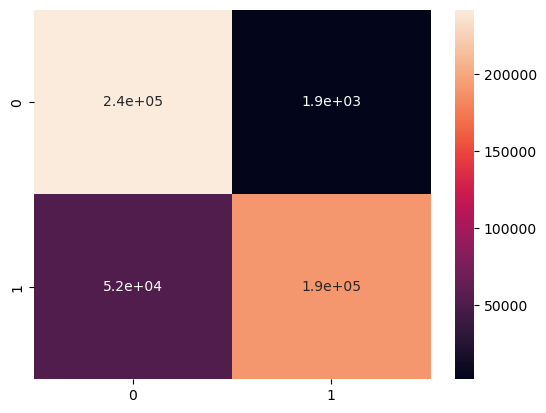

In [37]:
# Construct the Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create and initialise an object 'cm' by calling a method 'confusion_matrix()'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

print(cm, cm.shape)

Cross Validation

In [38]:
from sklearn.model_selection import cross_val_score

# Create an initialise an object 'nvclassifier' by calling a method 'GaussianNB()'
nvclassifier = GaussianNB()

X_resampled = sc.fit_transform(X_resampled)

# Calculate the score using cross validation method
cross_val_score(nvclassifier, X_resampled, y_resampled, scoring = 'accuracy')

array([0.49621845, 0.95960531, 0.99596812, 0.99609329, 0.61535273])

In [39]:
from sklearn.svm import LinearSVC

clf = LinearSVC().fit(X_train, y_train)

In [40]:
y_pred = clf.predict(X_test)

In [41]:
# Model Accuracy, how often is the classifier correct?
# In case of any errors, install conda install python-graphviz     on the command line
from sklearn.metrics import classification_report

# Display the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93    243913
           1       0.94      0.92      0.93    243453

    accuracy                           0.93    487366
   macro avg       0.93      0.93      0.93    487366
weighted avg       0.93      0.93      0.93    487366



In [42]:
clf = LinearSVC()
cross_val_score(clf, X_resampled, y_resampled, scoring = 'accuracy')

array([0.49625948, 0.93316932, 0.95553034, 0.96746388, 0.96743105])

[[229588  14325]
 [ 19540 223913]] (2, 2)


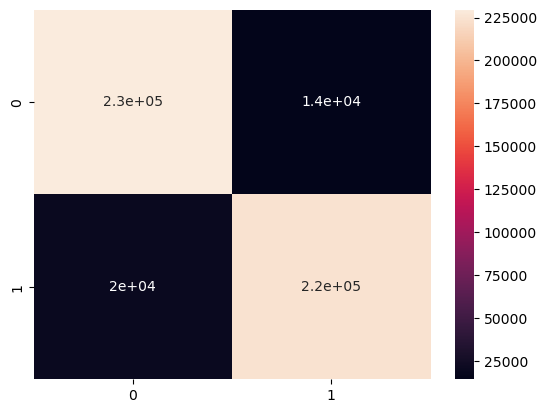

In [43]:
# Construct the Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create and initialise an object 'cm' by calling a method 'confusion_matrix()'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

print(cm, cm.shape)

3; 4; 5; 6; 7; 8; 9; 

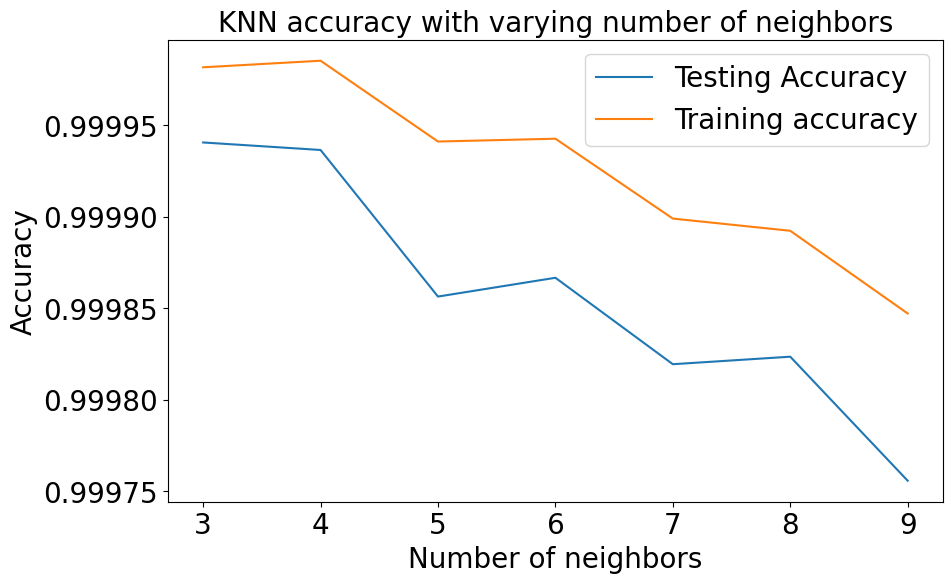

In [53]:
# Hyperparametrization - WARNING: this part may take some time.
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(3, 10, 1)   
train_accuracy = np.zeros(len(neighbors))    
test_accuracy = np.zeros(len(neighbors))    

for i, k in enumerate(neighbors):                         
    print(k, end="; ")
    kNN = KNeighborsClassifier(n_neighbors = k, weights='uniform')           
    kNN.fit(X_train, y_train)                             
    train_accuracy[i] = kNN.score(X_train, y_train)       
    test_accuracy[i] = kNN.score(X_test, y_test)          
    
plt.figure(figsize = (10, 6))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 20)
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend(prop={'size': 20})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [54]:
# modeling after setting hyperparam ("sweet spot")
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier(n_neighbors = 3, weights='uniform')
kNN.fit(X_train, y_train)

score = kNN.score(X_train, y_train)
y_pred = kNN.predict(X_test)

print("Score: ", score)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

Score:  0.999981533385587
Accuracy:  0.9999404964646693


In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    243913
           1       1.00      1.00      1.00    243453

    accuracy                           1.00    487366
   macro avg       1.00      1.00      1.00    487366
weighted avg       1.00      1.00      1.00    487366



[[243885     28]
 [     1 243452]] (2, 2)


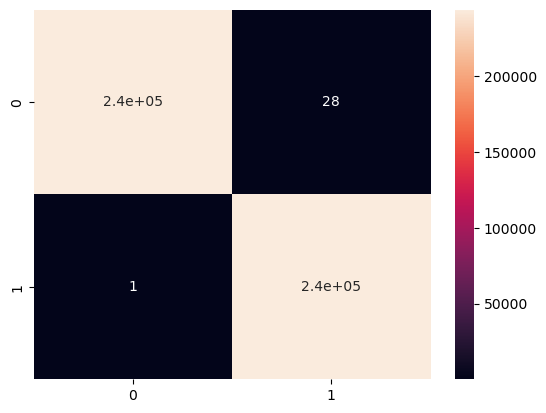

In [56]:
# Construct the Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create and initialise an object 'cm' by calling a method 'confusion_matrix()'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

print(cm, cm.shape)

In [57]:
clf = KNeighborsClassifier()
cross_val_score(clf, X_resampled, y_resampled, scoring = 'accuracy')

array([0.66028406, 0.91890899, 0.9858833 , 0.99986458, 0.69343984])